Development of plotting functions for basic.py classes.

In [1]:
%matplotlib inline
from kid_readout.measurement.io import npy
from kid_readout.analysis.resonator import plot_resonator

In [2]:
# Data from HPD cooldown 2016-10-11 of OneLayerAlStep01-0403
npd = npy.NumpyDirectory('/data/detectors/2016-10-18_124841_sweep_stream_on_off/')

In [3]:
# LO index 1, Attenuation 20
sss = npd.SingleSweepStream16

In [6]:
sweep_raw_defaults = {'linestyle': 'none',
                      'marker': ',',
                      'color': 'black',
                      'alpha': 0.2}

sweep_mean_defaults = {'linestyle': 'none',
                       'marker': '.',
                       'color': 'blue',
                       'alpha': 1}

stream_raw_defaults = {'linestyle': 'none',
                       'marker': ',',
                       'color': 'green',
                       'alpha': 0.2}

model_defaults = {'linestyle': '-',
                  'color': 'brown',
                  'alpha': 1,
                  'linewidth': 0.3}

resonance_defaults = {'linestyle': 'none',
                      'marker': '.',
                      'color': 'brown',
                      'alpha': 1}


def res_complex_plane(axis, resonator, normalize=True, num_model_points=1000,
                      sweep_mean=None, model=None, resonance=None):
    sweep_mean_kwds = sweep_mean_defaults.copy()
    if sweep_mean is not None:
        sweep_mean_kwds.update(sweep_mean)
    model_kwds = model_defaults.copy()
    if model is not None:
        model_kwds.update(model)
    resonance_kwds = resonance_defaults.copy()
    if resonance is not None:
        resonance_kwds.update(resonance)
    rd = plot_resonator.extract(sss.resonator, normalize=normalize, num_model_points=num_model_points)
    axis.plot(rd.s21_data.real, rd.s21_data.imag, **sweep_mean_kwds)
    axis.plot(rd.s21_model.real, rd.s21_model.imag, **model_kwds)
    axis.plot(rd.s21_r.real, rd.s21_r.imag, **resonance_kwds)

    
def sss_complex_plane(axis, sss, normalize=True, num_model_points=1000,
                      sweep_raw=None, sweep_mean=None, stream_raw=None, model=None, resonance=None):
    sweep_raw_kwds = sweep_raw_defaults.copy()
    if sweep_raw is not None:
        sweep_raw_kwds.update(sweep_raw)
    stream_raw_kwds = stream_raw_defaults.copy()
    if stream_raw is not None:
        stream_raw_kwds.update(stream_raw)
    for stream in sss.sweep.streams:
        if normalize:
            s21 = sss.resonator.remove_background(frequency=stream.frequency, s21_raw=stream.s21_raw)
        else:
            s21 = stream.s21_raw
        axis.plot(s21.real, s21.imag, marker=',', linestyle='none', color='black', alpha=0.2)
    if normalize:
        stream_s21 = sss.resonator.remove_background(frequency=sss.stream.frequency, s21_raw=sss.stream.s21_raw)
    else:
        stream_s21 = sss.stream.s21_raw
    axis.plot(stream_s21.real, stream_s21.imag, **stream_raw_kwds)
    res_complex_plane(axis, sss.resonator, normalize=normalize, num_model_points=num_model_points,
                      sweep_mean=sweep_mean, model=model, resonance=resonance)

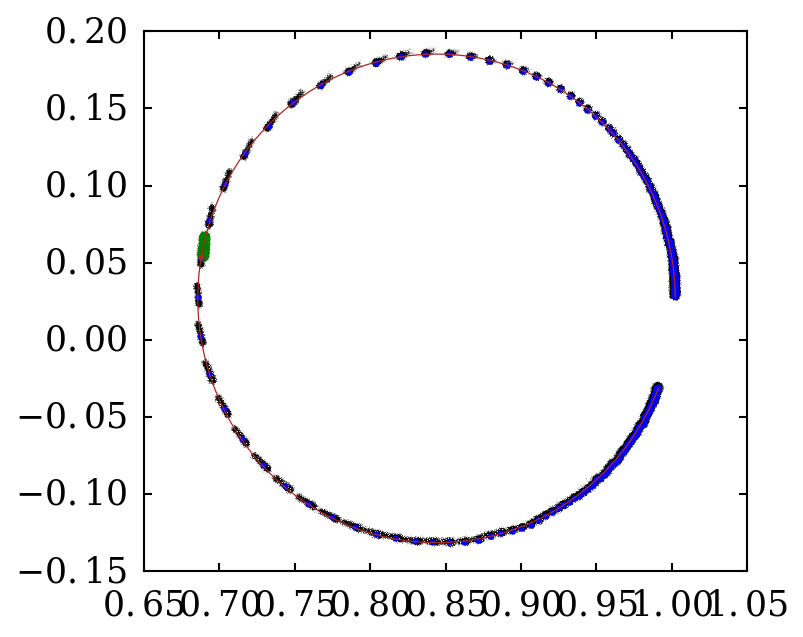

In [7]:
fig, ax = plt.subplots(figsize=(3, 3))
sss_complex_plane(ax, sss)

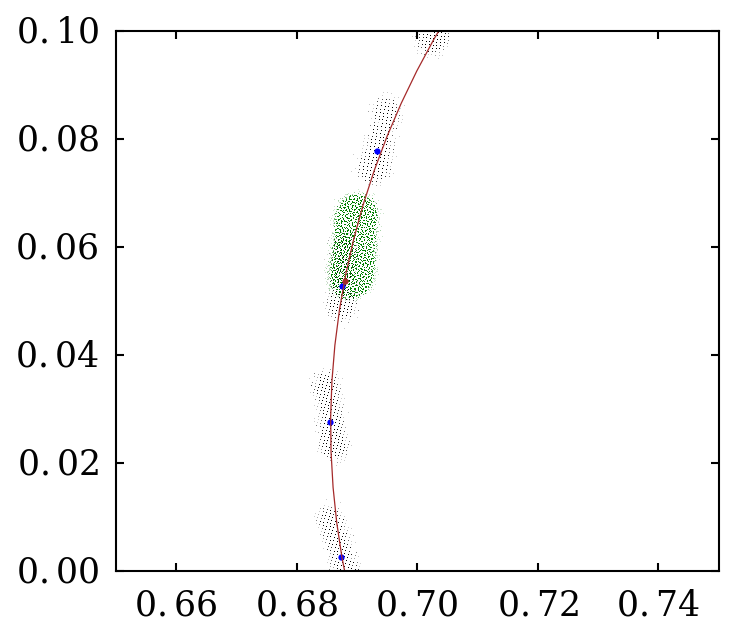

In [8]:
fig, ax = plt.subplots(figsize=(3, 3))
sss_complex_plane(ax, sss)
ax.set_xlim(0.65, 0.75)
ax.set_ylim(0, 0.1);